In [1]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and direc

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False  # '- 표시

### 1. 상관 분석과 단순 선형 회귀


  - **비즈니스 질문**: "온라인 광고비를 늘리면 매출이 오를까?" 또는 "제품 가격과 고객 만족도는 어떤 관계일까?"와 같이, 두 변수 간의 관계를 파악하는 것이 비즈니스 분석의 핵심임.
  - **분석 도구의 역할**
      - **상관 분석**: 두 변수가 얼마나 **친밀하게** 움직이는지, 즉 **관계의 강도**를 측정함.
      - **회귀 분석**: 한 변수가 변할 때 다른 변수가 '**얼마나**' 변하는지 예측하는 구체적인 **방정식**을 제공함.


### 2. 핵심 원리 파헤치기 (Deep Dive)

#### 가설 검정: 우리의 발견이 우연이 아님을 증명하는 과정

  - **가설 검정(Hypothesis Test)**: 데이터에서 발견한 패턴이 실제 의미가 있는지, 아니면 단순한 우연인지 통계적으로 확인하는 절차임.

  - **핵심 용어 (법정 비유)**

      - **귀무가설 (H\_0)**: '**무죄 추정의 원칙**'. "두 변수 사이에는 아무 관계가 없다" 또는 "차이가 없다"와 같이, 기본적으로 기각될 것을 예상하는 가설임.
      - **대립가설 (H\_1)**: '**검사의 주장**'. "두 변수 사이에 의미 있는 관계가 있다"와 같이, 데이터를 통해 입증하고자 하는 가설임.
      - **유의확률 (p-value)**: **귀무가설이 사실이라고 가정**할 때, 현재와 같은 데이터가 관찰될 확률. 이 값이 매우 낮으면 '우연히 발생하기 어려운 사건'임을 의미함.
      - **판결**: 일반적으로 **`p-value`가 유의수준 0.05보다 작으면**, "이런 우연은 드물다"고 판단하여 **귀무가설을 기각**하고 **대립가설을 채택**함. 즉, 두 변수 간 관계가 통계적으로 유의미하다고 결론 내림.

#### 상관 분석: 두 변수의 '밀당' 관계 파악하기

  - **상관 분석**: 두 변수가 함께 움직이는 경향성, 즉 **선형적 관계**의 강도와 방향을 분석하는 기법임.
  - **피어슨 상관계수 (Pearson Correlation)**
      - **-1 \~ 1** 사이의 값을 가지며, 두 변수가 모두 연속적인 숫자일 때 사용됨.
      - **`1`에 가까울수록**: 강한 **양의 상관관계** (하나가 증가하면 다른 하나도 증가).
      - **`-1`에 가까울수록**: 강한 **음의 상관관계** (하나가 증가하면 다른 하나는 감소).
      - **`0`에 가까울수록**: 선형적 관계가 거의 없음.
  - **스피어만 상관계수 (Spearman Correlation)**
      - 데이터의 실제 값이 아닌, 순위(rank)를 매겨 그 순위 간의 관계를 분석함.
      - 데이터가 정규분포를 따르지 않거나, 서열 척도(순서만 있는 데이터)일 때 유용함.

#### 단순 선형 회귀분석: 관계를 예측 방정식으로 만들기


  - **단순 회귀분석**: 하나의 독립변수(원인)를 통해 하나의 종속변수(결과)를 예측하는 **`y=ax+b`** 형태의 직선 방정식을 찾는 과정임.
  - **최소제곱법 (Ordinary Least Squares, OLS)**
      - '최적의 직선'을 찾는 가장 일반적인 방법.
      - 모든 데이터 점에서 직선까지의 **수직 거리(오차)의 제곱 합**이 **최소**가 되는 직선을 찾아냄.

### 3. 실전 코드 분석 및 적용 (Code Walkthrough & Application)

#### 3.1. 상관계수 계산 및 시각화 (피어슨 & 스피어만)


1. 피어슨 상관계수 계산하기

In [2]:
import seaborn as sns

# iris 데이터셋 로드
iris = sns.load_dataset("iris")

# 숫자형이 아닌 'species' 열을 제외합니다.
iris_numeric = iris.drop('species', axis=1)

# 피어슨 상관계수 행렬 계산
print(iris_numeric.corr(method='pearson'))

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


##### 코드 해설

2. 시각화

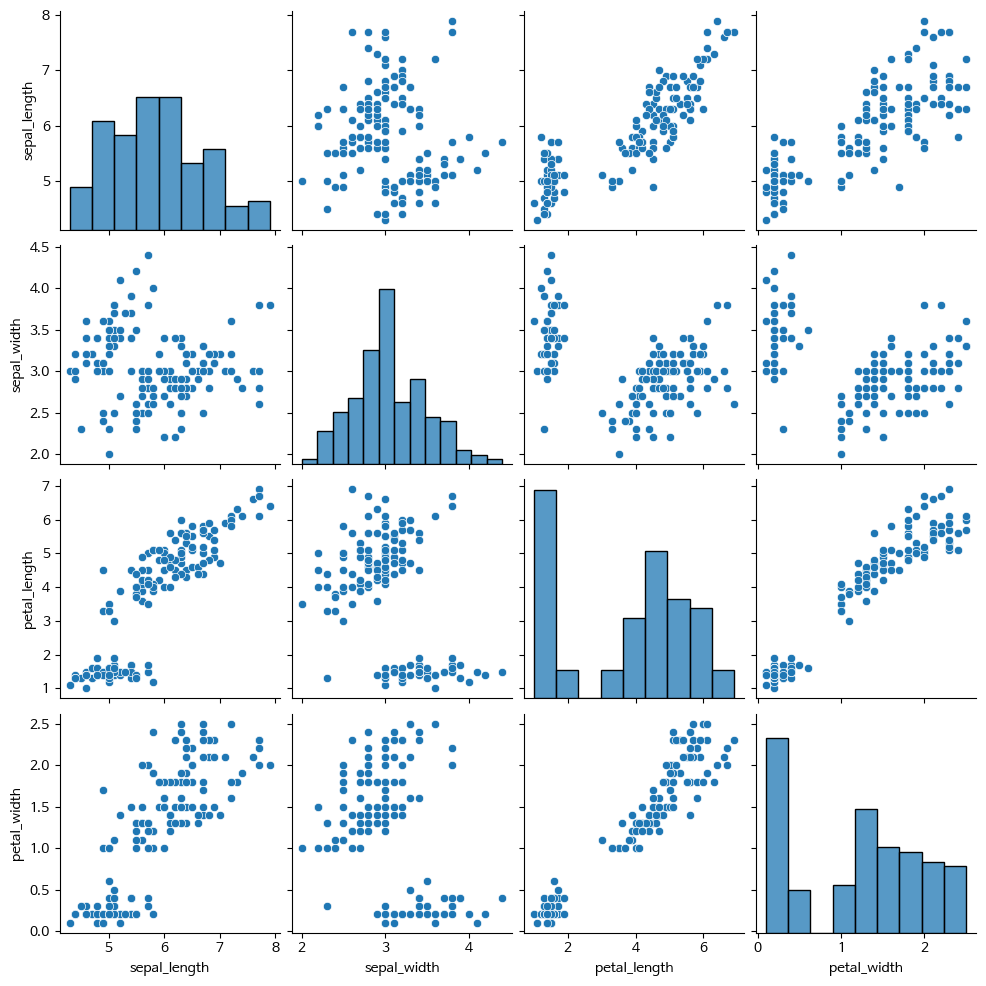

In [3]:
import matplotlib.pyplot as plt

# 모든 변수 쌍 간의 관계를 시각화
sns.pairplot(iris)
plt.show()

##### 코드 해설

3. 상관계수의 통계적 유의성 검정하기

  - **귀무가설(H\_0)**: `petal_length`와 `petal_width`의 상관계수는 0이다 (상관관계가 없다).
  - **대립가설(H\_1)**: 상관계수는 0이 아니다 (상관관계가 있다).

In [4]:
from scipy.stats import pearsonr

# 'petal_length'와 'petal_width'의 피어슨 상관계수와 p-value 계산
corr, p_value = pearsonr(iris.petal_length, iris.petal_width)
print(f"상관계수: {corr}, p-value: {p_value}")

상관계수: 0.962865431402796, p-value: 4.675003907328585e-86


##### 코드 해설

   •   상관계수(corr) = 0.9629

→ 꽃잎 길이(petal_length)와 꽃잎 너비(petal_width)는 매우 강한 양의 선형 상관관계를 가짐.

→ 즉, 꽃잎 길이가 길어질수록 너비도 거의 비례적으로 넓어짐.

  •   p-value ≈ 4.66 × 10⁻⁸⁶ (극도로 작음)

→ 귀무가설(H0: 상관 없음)을 강하게 기각 가능.

→ 통계적으로 유의미한 상관관계가 있다고 결론 내릴 수 있음.

4. 스피어만 상관계수 계산하기

In [5]:
# 스피어만 상관계수 행렬 계산
iris_numeric = iris.drop('species', axis=1)
print(iris_numeric.corr(method='spearman'))

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.166778      0.881898     0.834289
sepal_width      -0.166778     1.000000     -0.309635    -0.289032
petal_length      0.881898    -0.309635      1.000000     0.937667
petal_width       0.834289    -0.289032      0.937667     1.000000


##### 코드 해설

#### 3.2. 상관계수 히트맵 시각화

  - 변수가 많을 때, 상관계수 행렬을 히트맵(Heatmap)으로 시각화하면 관계의 강도를 색상으로 한눈에 파악할 수 있음.

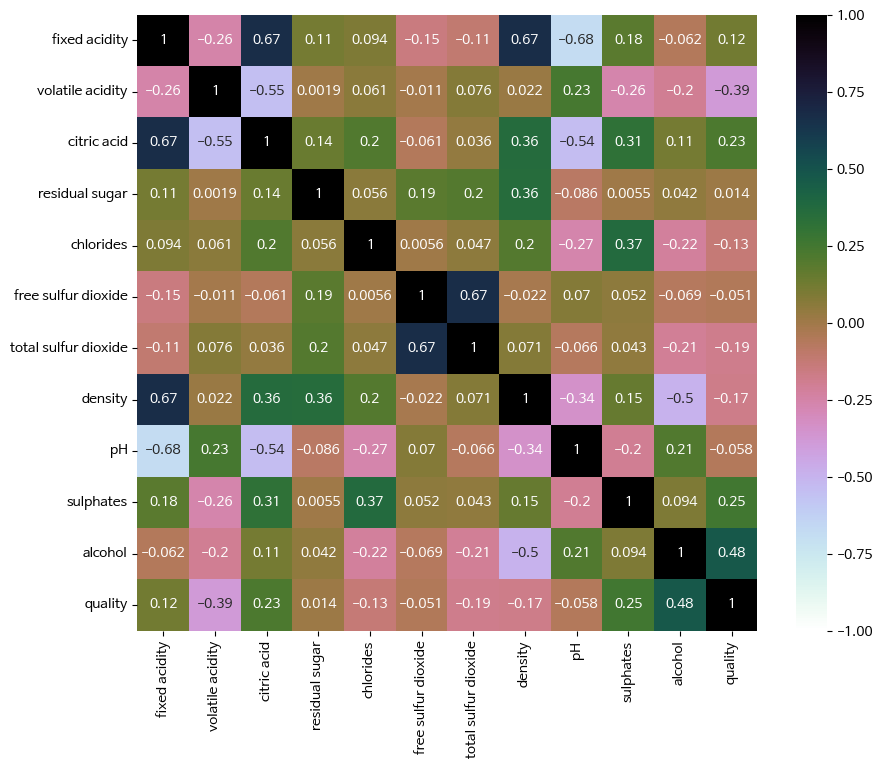

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 웹에서 레드와인 데이터 로드
redwine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
redwine = pd.read_csv(redwine_url, delimiter=';')

# 상관계수 계산
corr_matrix = redwine.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="cubehelix_r")
plt.show()

##### 코드 해설

#### 3.3. 단순 선형 회귀 모델 만들기

  - 변수 간 관계를 바탕으로 예측 모델을 만드는 3가지 방법을 알아봄.

방법 1: 행렬 연산을 이용한 원리 이해 (Numpy)

In [7]:
import numpy as np

X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

# X 데이터에 상수항(bias)을 위한 1을 추가하여 행렬 A를 생성
A = np.c_[X, np.ones(len(X))] # [[32,1], [64,1]].....
B = np.array(Y)

# 의사 역행렬 공식을 사용하여 회귀 계수(w, b) 계산
model = np.linalg.inv(A.T @ A) @ A.T @ B # ols 정규방정식
print(model)

[  0.87962664 -27.35846347]


##### 코드 해설

방법 2: 통계 함수를 이용한 회귀 분석 (Scipy)

In [8]:
from scipy import stats

X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

# 선형 회귀 분석 수행
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print(f"기울기(slope): {slope}")
print(f"y절편(intercept): {intercept}")
print(f"상관계수(r_value): {r_value}")
print(f"p-value: {p_value}")
print(f"결정계수(R-squared): {r_value**2}")
print(f"표준오차(std_err): {std_err}")

기울기(slope): 0.8796266379465087
y절편(intercept): -27.3584634715491
상관계수(r_value): 0.89008928103186
p-value: 0.003051790677096642
결정계수(R-squared): 0.7922589282078135
표준오차(std_err): 0.18388671751663876


##### 코드 해설

##### 시각화

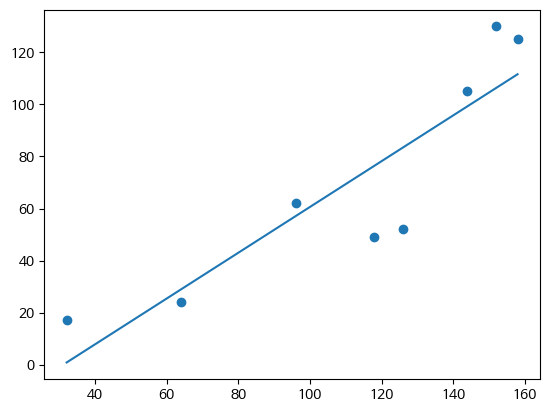

In [9]:
# 산점도와 회귀 직선 시각화
plt.scatter(X, Y)
plt.plot(np.array(X), slope * np.array(X) + intercept, '-')
plt.show()

방법 3: 다항 회귀 및 포뮬러를 이용한 확장 (Numpy, polyfit)

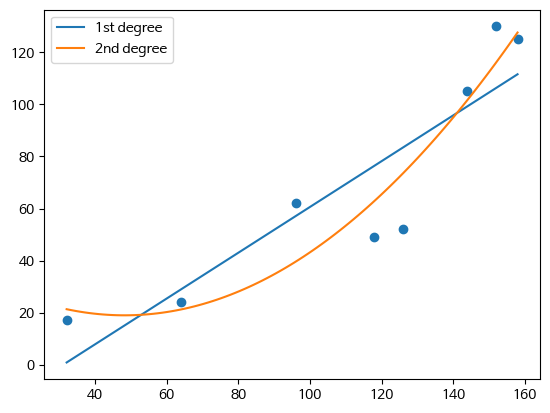

In [10]:
# 1차 다항 회귀 (선형 회귀와 동일)
fit_1d = np.polyfit(X, Y, 1)
fit_fn_1d = np.poly1d(fit_1d)

# 2차 다항 회귀
fit_2d = np.polyfit(X, Y, 2)
fit_fn_2d = np.poly1d(fit_2d)

# 그래프를 그리기 위한 X축 샘플 데이터
sample_X = np.linspace(min(X), max(X), 100)

plt.scatter(X, Y)
plt.plot(sample_X, fit_fn_1d(sample_X), label='1st degree')
plt.plot(sample_X, fit_fn_2d(sample_X), label='2nd degree')
plt.legend()
plt.show()

- X, Y 데이터와 차수(deg)가 주어지면 해당 차수의 회귀 곡선을 그리는 함수를 만들 수 있음.

In [11]:
def draw_polyfit(X,Y,deg=1):
	fit = np.polyfit(X,Y,deg)
	print(fit)

	fit_fn = np.poly1d(fit)
	sample_X = np.linspace(min(X), max(X), 100)

	plt.scatter(X,Y)
	plt.plot(sample_X, fit_fn(sample_X), '-')
	plt.show()

3~6차수 그래프 그리기

[ 1.36900759e-04 -3.06581641e-02  2.52476185e+00 -3.87896220e+01]


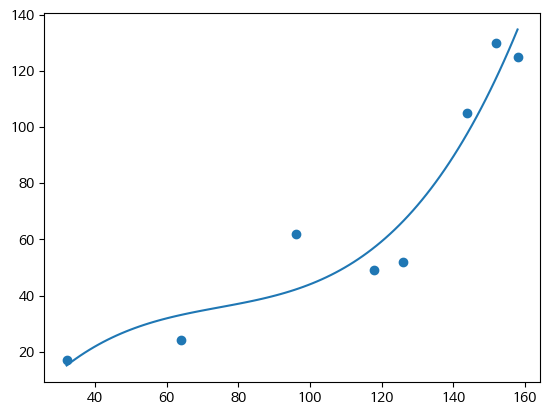

[ 1.99322810e-06 -6.27067834e-04  7.07083835e-02 -2.84352700e+00
  5.30450887e+01]


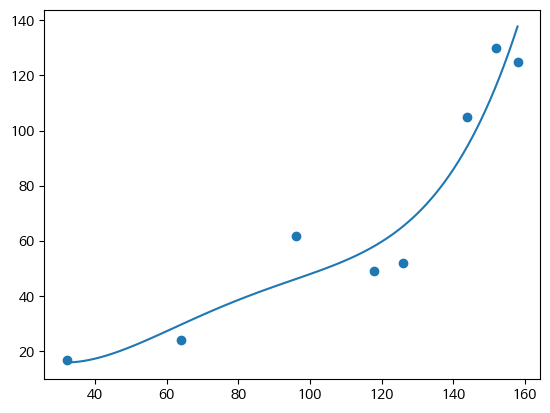

[-3.60679943e-07  1.80553138e-04 -3.41559339e-02  3.01519333e+00
 -1.21436798e+02  1.75743817e+03]


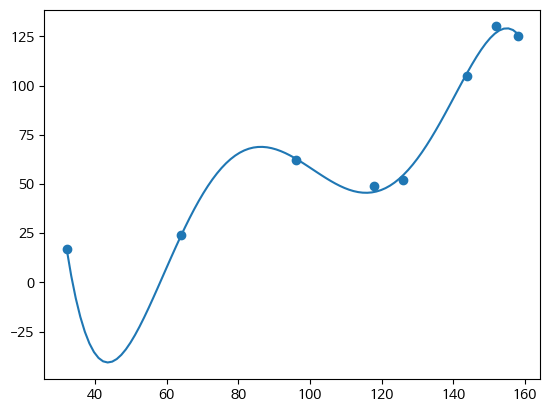

[-6.18327318e-09  3.46694642e-06 -7.70219609e-04  8.62372828e-02
 -5.09766458e+00  1.50398974e+02 -1.70364025e+03]


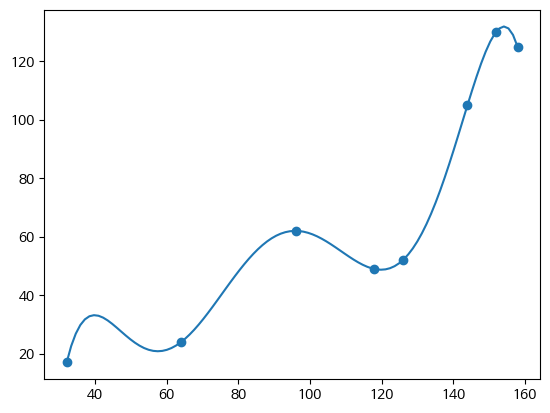

In [12]:
draw_polyfit(X,Y,3)
draw_polyfit(X,Y,4)
draw_polyfit(X,Y,5)
draw_polyfit(X,Y,6)

#### 3.4. 포뮬러를 이용한 회귀 분석 (Statsmodels)

  - **`statsmodels`** 라이브러리는 R과 유사한 **포뮬러(formula)** 문법을 지원하여 코드를 더 직관적으로 작성하게 해줌.

**포뮬러 기본 개념**

  - **기본 형식**: `종속변수 ~ 독립변수1 + 독립변수2 + ...`
  - `~`는 "는 \~의 함수로 모델링됩니다" 라고 해석함.

**포뮬러에서 사용되는 주요 기호**

| 기호 | 의미 | 예시 |
| :--- | :--- | :--- |
| `+` | 이 변수를 모델에 포함합니다. | `Y ~ X + Z` |
| `-` | 이 변수를 모델에서 제외합니다. | `Y ~ X + Z - 1` (절편 제외) |
| `:` | 두 변수 간의 상호작용(곱) 항을 포함합니다. | `Y ~ X : Z` (모델: `y=a+b(xz)`) |
| `*` | 각 변수와 그 변수들 간의 상호작용 항을 모두 포함합니다. | `Y ~ X * Z` (모델: `y=a+bx+cz+d(xz)`) |
| `I()` | 변수에 대한 수학적 연산을 적용합니다. | `Y ~ I(X**2)` (제곱 항 추가) |
| `C()` | 범주형 변수임을 명시합니다. | `Y ~ C(group)` |

--- ols('y ~ x') 결과 (계수) ---
Intercept   -27.358463
x             0.879627
dtype: float64

--- OLS.from_formula('y ~ x') 결과 (계수) ---
Intercept   -27.358463
x             0.879627
dtype: float64

--- 3차 다항 회귀(절편 없음) 결과 (계수) ---
x            1.005637
I(x ** 2)   -0.013981
I(x ** 3)    0.000082
dtype: float64


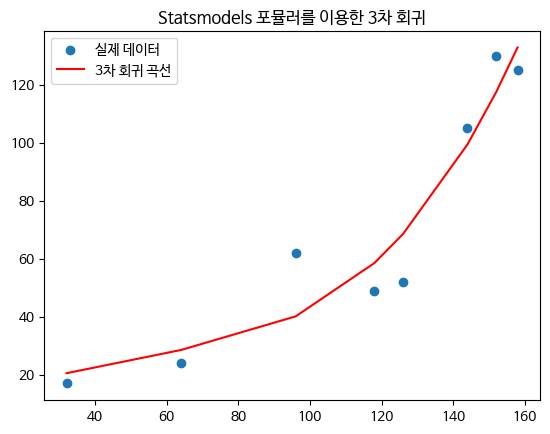

In [13]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 예제 데이터를 pandas DataFrame으로 변환
df = pd.DataFrame({'x': X, 'y': Y})

# 1. 기본 1차 선형 회귀 (y ~ x)
# ols() 함수 사용
model1 = ols("y ~ x", data=df)
result1 = model1.fit()
print("--- ols('y ~ x') 결과 (계수) ---")
print(result1.params)

# OLS.from_formula() 메소드 사용 (결과는 동일)
model1_alt = sm.OLS.from_formula("y ~ x", data=df)
result1_alt = model1_alt.fit()
print("\n--- OLS.from_formula('y ~ x') 결과 (계수) ---")
print(result1_alt.params)

# 2. 상수항(절편)을 포함하지 않는 3차 다항 회귀
# 포뮬러: y ~ x + x^2 + x^3
model2 = ols("y ~ x + I(x**2) + I(x**3) - 1", data=df)
result2 = model2.fit()
print("\n--- 3차 다항 회귀(절편 없음) 결과 (계수) ---")
print(result2.params)

# 3. 생성된 회귀 모델로 예측하고 시각화하기
y_predicted = result2.predict(df) # 학습에 사용된 x값으로 y 예측

plt.scatter(X, Y, label="실제 데이터")
# 예측값은 순서가 보장되지 않으므로, 정렬 후 plot
plt.plot(df['x'].sort_values(), y_predicted[df['x'].sort_values().index], color='red', label="3차 회귀 곡선")
plt.title("Statsmodels 포뮬러를 이용한 3차 회귀")
plt.legend()
plt.show()

##### 코드 해설

### 4. 핵심 요약 (Key Takeaways)

  - **비즈니스 관점**: **상관 분석**은 비즈니스의 \*\*핵심 동인(Key Driver)\*\*을 찾는 데 사용되고, **회귀 분석**은 이를 기반으로 구체적인 **예측과 시뮬레이션**을 가능하게 함.
  - **기술 관점**: **피어슨 상관계수**는 **선형 관계**를, **스피어만 상관계수**는 **순위 기반 관계**를 측정함. 단순 선형 회귀는 \*\*최소제곱법(OLS)\*\*을 이용해 오차를 최소화하는 최적의 직선을 찾음.
  - **해석의 중요성**: **상관관계가 인과관계를 의미하지 않음**을 명심해야 함. 모델 생성 후에는 **p-value**로 통계적 유의성을, \*\*결정계수(R²)\*\*로 설명력을 반드시 평가해야 함.